In [1]:
import pandas as pd

In [8]:
# reading the dataset- data ingestion 
df=pd.read_csv('data/gemstone.csv')

In [10]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#no missing values in the data

In [11]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [12]:
df=df.drop(labels=['id'],axis=1)

#here axis=1 means columns

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


As you can see the ID column is dropped now

In [14]:
df.duplicated().sum()

0

There are no duplicated records.if there are duplicated records then we can drop the records/rows by using axis 0

In [18]:
#seggregate reccords to object and categorical columns
numerical_columns=df.columns[df.dtypes!='object']

In [19]:
categorical_columns=df.columns[df.dtypes=='object']

In [20]:
print("Numerical columns",numerical_columns)
print("categorical columns",categorical_columns)

Numerical columns Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
categorical columns Index(['cut', 'color', 'clarity'], dtype='object')


In [22]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [23]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


Let's explore the variables one by one and do feature enginnering on it

In [24]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [25]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [28]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [29]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

#let's do one hot encoding on the columns



One hot encoding is a technique used to convert categorical data into a numerical format that can be easily processed by machine learning algorithms. It works by representing each category as a binary vector, where each element of the vector represents a possible category value, and only one element is set to 1 to indicate the category.

For example, consider a dataset with a categorical feature "color" that can take the values "red", "green", and "blue". To encode this feature using one hot encoding, we would create three binary vectors, one for each possible value:

"red" : [1, 0, 0]
"green" : [0, 1, 0]
"blue" : [0, 0, 1]
When we encounter a data point with a "color" value of "green", we would use the corresponding binary vector [0, 1, 0] to represent the feature in the numerical format.

/n


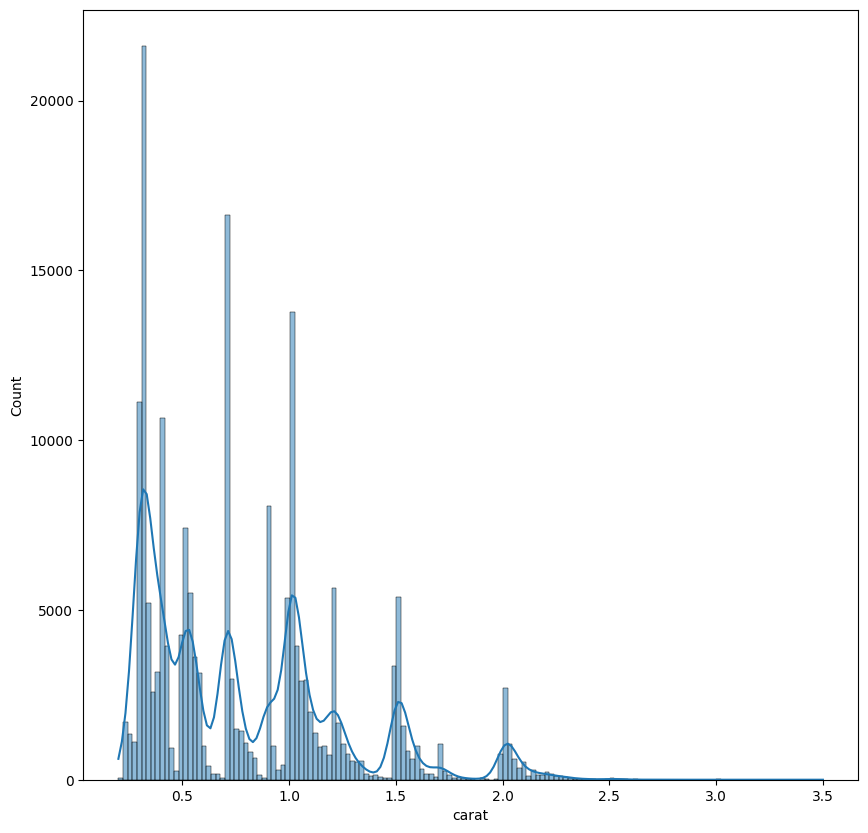

/n


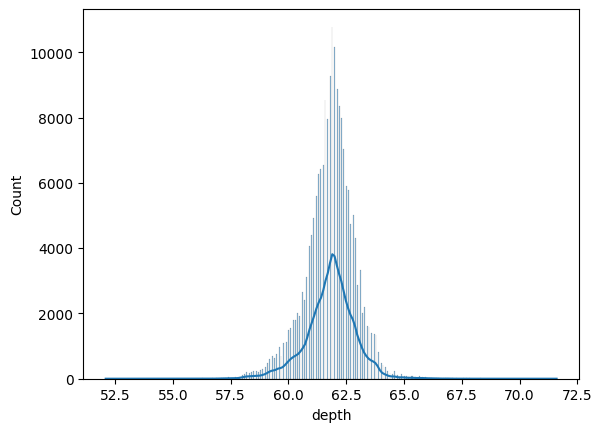

/n


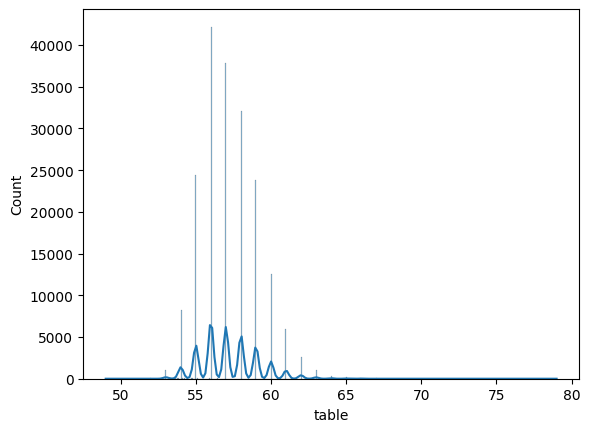

/n


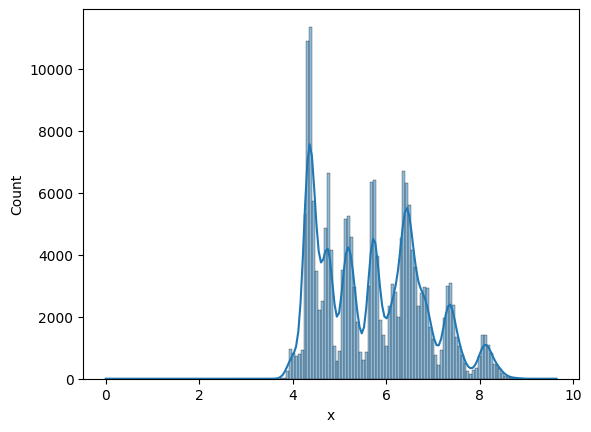

/n


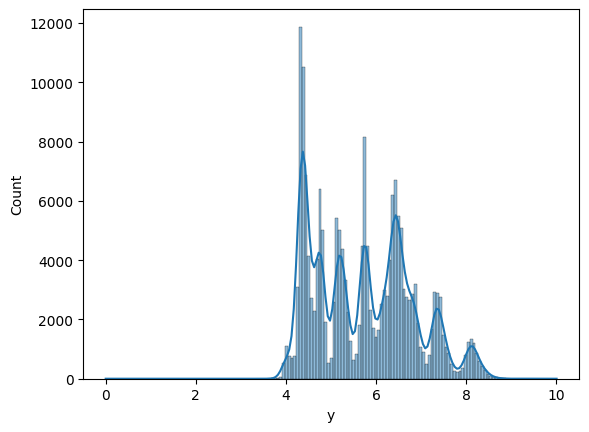

/n


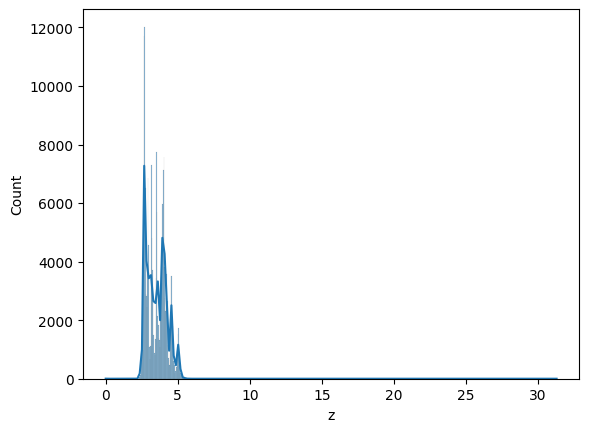

/n


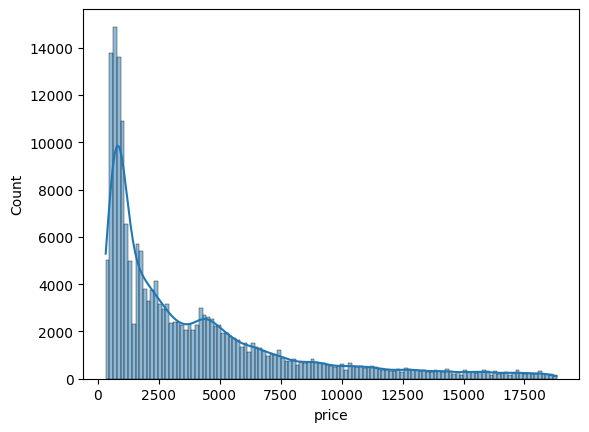

In [30]:
#let's do some EDA on the dataset

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('/n')
    plt.show()

A loop is initiated to create a histogram plot for each numerical column in the dataframe "df". The loop iterates over each column name in the list "numerical_columns".

Within the loop, the "sns.histplot()" function is used to create a histogram plot of the current column with the following arguments:
"data=df": specifies the dataframe to use for plotting.
"x=i": specifies the column name to use as the x-axis variable.
"kde=True": specifies that a kernel density estimate plot should also be included on top of the histogram bars.

In the context of plotting, a KDE plot is a visualization that shows the estimated probability density function of a dataset as a continuous curve. It is often overlaid on a histogram to provide a smoother estimate of the distribution, and can be particularly useful when the data is noisy or the underlying distribution is not well-known.


The print function is called to add a newline character after each histogram plot.

The "plt.show()" function is called to display the histogram plot for the current column.

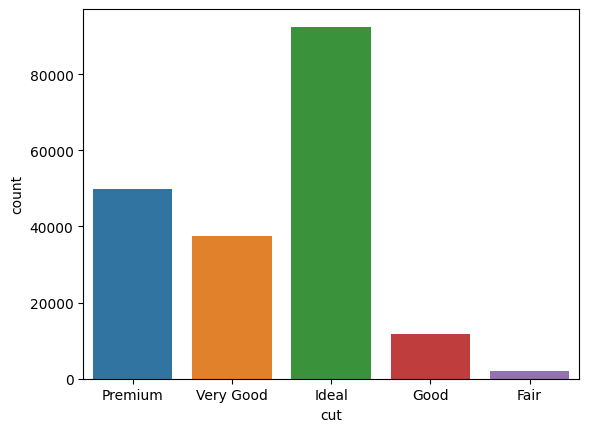

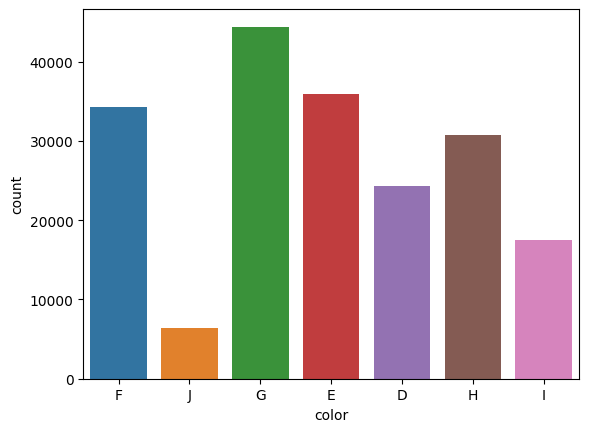

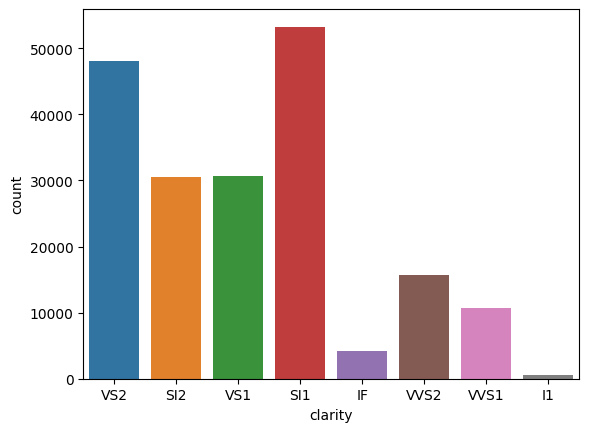

In [34]:
# Plotting countplot for categoricaql variables

for i in categorical_columns:
    sns.countplot(data=df,x=i)
    plt.show()

<Axes: >

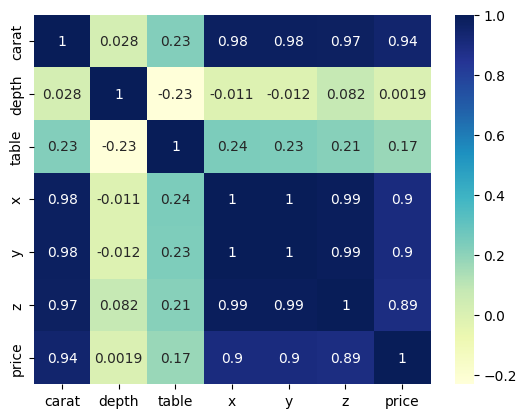

In [44]:
sns.heatmap(df.corr(numeric_only=True),cmap="YlGnBu", annot=True)


we see there is high correlation between carat and x and y
 and Z. This will creat multicollinearity so we can drop x,y and z


sns: This is the alias for the seaborn library that we are importing at the beginning of our Python script.

heatmap(): This is a function provided by the seaborn library that creates a heatmap visualization.

df.corr(numeric_only=True): This generates a correlation matrix for the DataFrame df. The numeric_only=True argument specifies that only numeric columns should be included in the correlation matrix, which helps to avoid issues with non-numeric columns like strings that may cause errors or distort the results.

cmap="YlGnBu": This specifies the color map to be used in the heatmap. In this case, we're using the "YlGnBu" color map, which ranges from yellow to green to blue.

annot=True: This adds data labels to the heatmap, indicating the correlation coefficient between each pair of variables.

In [45]:
df=df.drop(labels=['x','y','z'],axis=1)

In [46]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453


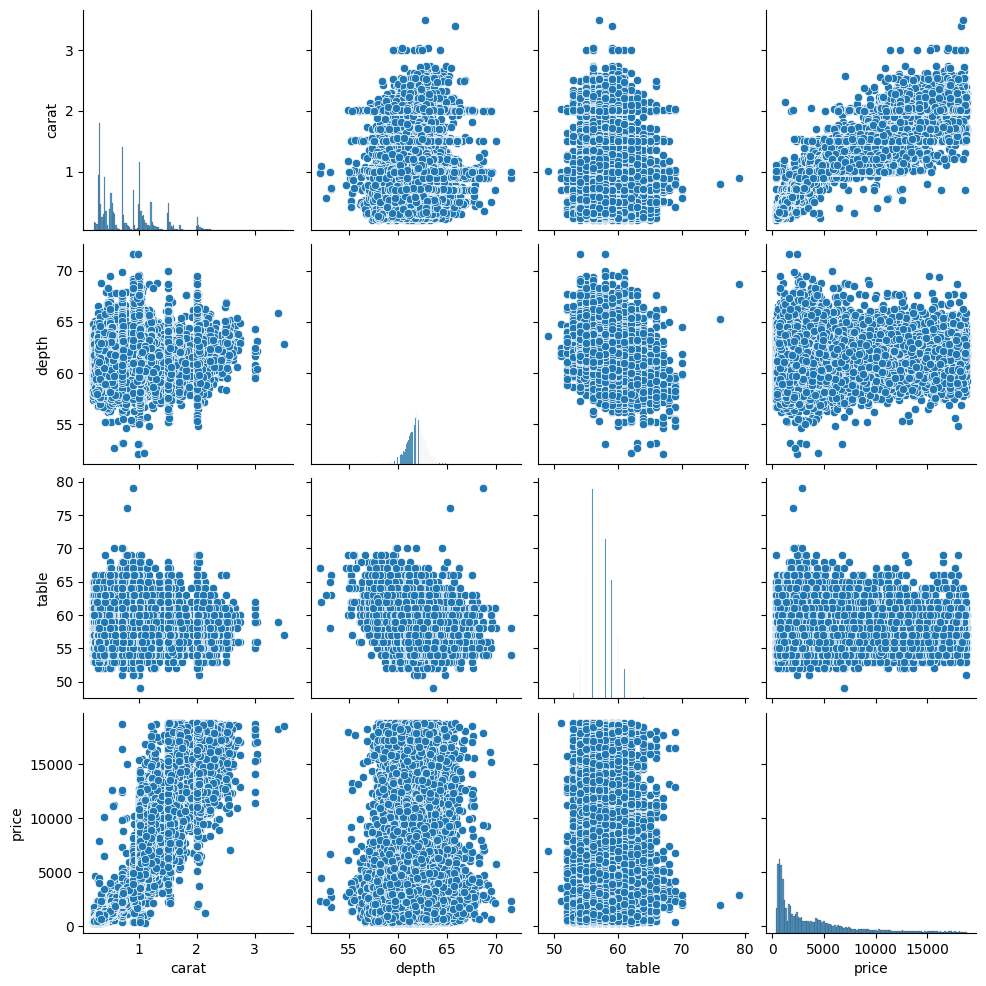

In [47]:
sns.pairplot(df)
# it will show the scatterplot of all the numerical attributes

Pair plots are drawn in order to visually analyze the relationships between pairs of variables. They can help identify patterns or trends in the data, such as linear or nonlinear relationships between variables, outliers, or clusters of data points with similar characteristics. Pair plots can also reveal potential problems with the data, such as missing values, skewed distributions, or high levels of noise or variability.

In [49]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/


Check the grading system of diamonds and we will rank it accordingly

In [55]:
cut_map={"fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [51]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [57]:
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}

In [52]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [58]:
color_map={"D":1,"E":2,"F":3, "G":4,"H":5,"I":6,"H":7}

In [59]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)